In this notebook I reproduce the results from my paper.

In [62]:
import sympy
sympy.init_printing()

Pressure immediately downstream

In [63]:
gamma_s = sympy.Symbol('gamma_s',positive=True)
p_s = sympy.Symbol('p_s')
eta = sympy.Symbol('eta')
n_0 = sympy.Symbol('n_0')
m = sympy.Symbol('m',positive=True)
c = sympy.Symbol('c',positive=True)
eqn_1 = sympy.Eq(p_s, eta*n_0*m*c**2*gamma_s**2)
eqn_1

Density immediately downstream

In [65]:
n_s = sympy.Symbol('n_s')
downstream_density = sympy.Eq(n_s,n_0*gamma_s)
downstream_density

Entropy

In [66]:
n = sympy.Symbol('n')
p = sympy.Symbol('p')
entropy = sympy.log(p) - eta*sympy.log(n)
entropy

Adiabatic relations

In [67]:
p_t = sympy.Symbol('p_t')
n_t = sympy.Symbol('n_t')
eqn_2 = sympy.Eq(entropy.subs({p:p_s,n:n_s}),
                entropy.subs({p:p_t,n:n_t}))
eqn_2

Spherical Riemann invariant

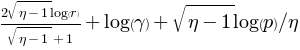

In [68]:
r = sympy.Symbol('r')
gamma = sympy.Symbol('gamma')
riemann_invariant = sympy.log(gamma)+sympy.sqrt(eta-1)*sympy.log(p)/eta + 2*sympy.sqrt(eta-1)/(1+sympy.sqrt(eta-1))*sympy.log(r)
riemann_invariant

Terminal pressure

In [69]:
terminal_pressure = sympy.Eq(p_t,m*n_t*c**2)
terminal_pressure

Breakout lorentz factor profile

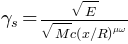

In [70]:
E = sympy.Symbol('E',positive=True)
M = sympy.Symbol('M',positive=True)
x = sympy.Symbol('x',positive=True)
R = sympy.Symbol('R',positive=True)
mu = sympy.Symbol('mu',positive=True)
omega = sympy.Symbol('omega',positive=True)
lf_profile = sympy.Eq(gamma_s,sympy.sqrt(E/M/c**2)*(x/R)**(-mu*omega))
lf_profile

Upstream (unshocked) density profile

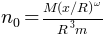

In [72]:
upstream_density_profile = sympy.Eq(n_0,(M/m)*(x/R)**omega/R**3)
upstream_density_profile

Ansatz for the terminal lorentz factor

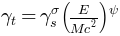

In [73]:
psi = sympy.Symbol('psi',real=True)
gamma_t = sympy.Symbol('gamma_t',positive=True)
sigma = sympy.Symbol('sigma', positive=True)
terminal_gamma_ansatz = sympy.Eq(gamma_t,(E/M/c**2)**psi*gamma_s**sigma)
terminal_gamma_ansatz

Width of a cell at the end of the acceleration phase

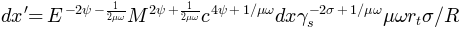

In [74]:
dxt = sympy.Symbol("dx'")
dx = sympy.Symbol('dx')
r_t = sympy.Symbol('r_t', positive=True)
temp = sympy.sqrt(1-1/gamma_t**2)
temp = sympy.series(temp,x=gamma_t,x0=sympy.oo,n=3).removeO()
temp = temp.subs(gamma_t,sympy.solve(terminal_gamma_ansatz,gamma_t)[0])
temp = temp.subs(gamma_s,lf_profile.rhs)
temp = -temp.diff(x)
temp = temp.subs(x,sympy.solve(lf_profile,x)[0])
temp = sympy.expand_power_base(temp,force=True)
temp = temp.simplify()
eqn_6 = sympy.Eq(dxt,dx*temp*r_t)
eqn_6

The terminal density is given by

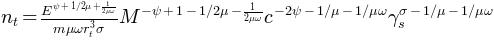

In [75]:
temp = n_0*(R**2*dx)/(gamma_t*r_t**2*dxt)
temp = temp.subs(gamma_t,terminal_gamma_ansatz.rhs)
temp = temp.subs(dxt,eqn_6.rhs)
temp = temp.subs(n_0,upstream_density_profile.rhs)
temp = temp.subs(x,sympy.solve(lf_profile,x)[0])
temp = temp.simplify()
eqn_7 = sympy.Eq(n_t,temp)
eqn_7

Conservation of the Riemann invariant

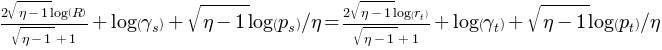

In [76]:
riemann_invariant_conservation = sympy.Eq(riemann_invariant.subs({r:R,p:p_s,gamma:gamma_s}),
                                          riemann_invariant.subs({r:r_t,p:p_t,gamma:gamma_t}))
riemann_invariant_conservation

We are now ready to calculate the terminal radius and Lorentz factor

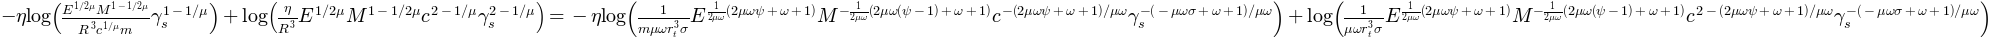

In [77]:
temp = eqn_2
temp = temp.subs(n_s,downstream_density.rhs)
temp = temp.subs(p_s, eqn_1.rhs)
temp = temp.subs(p_t,terminal_pressure.rhs)
temp = temp.subs(n_t, eqn_7.rhs)
temp = temp.subs(n_0, upstream_density_profile.rhs)
temp = temp.subs(x,sympy.solve(lf_profile,x)[0])
temp = sympy.expand_power_base(temp)
temp = temp.simplify()
r_t_gamma_relation = temp
r_t_gamma_relation

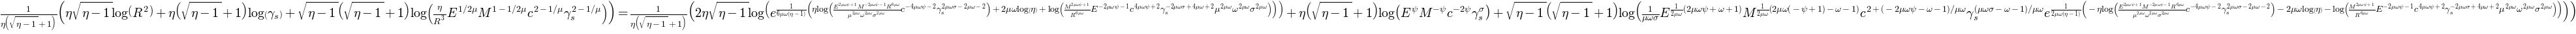

In [78]:
temp = riemann_invariant_conservation
temp = temp.subs(p_t,terminal_pressure.rhs)
temp = temp.subs(n_t,eqn_7.rhs)
temp = temp.subs(p_s,eqn_1.rhs)
temp = temp.subs(gamma_t,terminal_gamma_ansatz.rhs)
temp = temp.subs(n_0, upstream_density_profile.rhs)
temp = temp.subs(x,sympy.solve(lf_profile,x)[0])
temp = temp.subs(r_t,sympy.solve(sympy.expand_log(r_t_gamma_relation),r_t)[0])
temp = sympy.expand_power_base(temp)
temp = temp.simplify()
raw_gamma_relation = temp
raw_gamma_relation

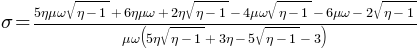

In [79]:
temp = sympy.Eq(gamma_s*raw_gamma_relation.lhs.diff(gamma_s),
                gamma_s*raw_gamma_relation.rhs.diff(gamma_s))
temp = temp.simplify()
sigma_relation = sympy.Eq(sigma,sympy.solve(temp,sigma)[0].simplify())
sigma_relation

In [80]:
[sigma_relation.subs({mu:0.23,omega:sympy.Rational(3,1),eta:sympy.Rational(4,3)}).n(),
 sigma_relation.subs({mu:0.23,omega:sympy.Rational(3,2),eta:sympy.Rational(4,3)}).n()]

Solving for $\psi$

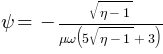

In [81]:
temp = sympy.Eq(E*raw_gamma_relation.lhs.diff(E),
               E*raw_gamma_relation.rhs.diff(E))
temp = temp.simplify()
psi_relation = sympy.Eq(psi,sympy.solve(temp,psi)[0])
psi_relation

In [82]:
[psi_relation.subs({mu:0.23,omega:sympy.Rational(3,1),eta:sympy.Rational(4,3)}).n(),
 psi_relation.subs({mu:0.23,omega:sympy.Rational(3,2),eta:sympy.Rational(4,3)}).n()]

We can now calculate the terminal distance

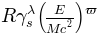

In [83]:
pomega = sympy.Symbol('varpi',positive=True)
lmbda = sympy.Symbol('lambda',positive=True)
r_t_ansatz = R*(E/M/c**2)**pomega*gamma_s**lmbda
r_t_ansatz

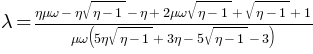

In [84]:
temp = r_t_gamma_relation
temp = temp.subs(r_t,r_t_ansatz)
temp = temp.rhs - temp.lhs
temp = gamma_s*temp.diff(gamma_s)
temp = temp.subs(sigma,sigma_relation.rhs)
temp = temp.simplify()
lambda_relation = sympy.Eq(lmbda,sympy.solve(temp,lmbda)[0])
lambda_relation

In [85]:
[lambda_relation.subs({mu:0.23,omega:omega_val,eta:4./3.}) for omega_val in [1.5,3]]

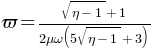

In [86]:
temp = r_t_gamma_relation
temp = temp.subs(r_t,r_t_ansatz)
temp = temp.rhs - temp.lhs
temp = E*temp.diff(E)
temp = temp.subs(sigma,sigma_relation.rhs)
temp = temp.subs(psi,psi_relation.rhs)
temp = temp.simplify()
pomega_relation = sympy.Eq(pomega,sympy.solve(temp,pomega)[0])
pomega_relation

In [87]:
[pomega_relation.subs({mu:0.23,omega:omega_val,eta:4./3.}) for omega_val in [1.5,3]]

# Closure relations #

Breakout shell width

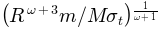

In [88]:
sigma_t = sympy.Symbol('sigma_t',positive=True)
temp = sympy.Eq(sigma_t*x*n_0,1)
temp = temp.subs(n_0,upstream_density_profile.rhs)
temp = sympy.solve(temp,x)[0]
breakout_shell_width = temp
breakout_shell_width

breakout shell rest mass

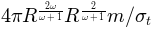

In [89]:
temp = 4*sympy.pi*n_0*R**2*x*m
temp = temp.subs(n_0,upstream_density_profile.rhs)
temp = temp.subs(x,breakout_shell_width)
temp = sympy.expand_power_base(temp)
temp = temp.simplify()
breakout_shell_rest_mass = temp
breakout_shell_rest_mass

Breakout shell lorentz factor

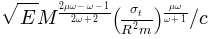

In [90]:
temp = lf_profile
temp = temp.rhs
temp = temp.subs(x,breakout_shell_width)
temp = sympy.expand_power_base(temp)
temp = temp.simplify()
breakout_shell_lorentz_factor = temp
breakout_shell_lorentz_factor

breakout shell energy

In [91]:
temp = breakout_shell_rest_mass*c**2*breakout_shell_lorentz_factor**2
temp = sympy.expand_power_base(temp)
temp = temp.simplify()
breakout_shell_energy = temp
breakout_shell_energy

Observed temperature

In [92]:
T_ob = sympy.Symbol('T_ob',positive=True)
Tp_th = sympy.Symbol(r"T'_th",positive=True)
observed_temperature = sympy.Eq(T_ob,Tp_th*gamma_t)
observed_temperature

Observed energy

In [93]:
E_bo = sympy.Symbol('E_bo',positive=True)
E_0 = sympy.Symbol('E_0',positive=True)
Tp_0 = sympy.Symbol("T'_0",positive=True)
observed_energy = sympy.Eq(E_bo,E_0*(gamma_t/gamma_s)*Tp_th/Tp_0)
observed_energy

Breakout duration

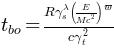

In [94]:
t_bo = sympy.Symbol('t_bo')
temp = sympy.Eq(t_bo,r_t/gamma_t**2/c)
temp = temp.subs(r_t, r_t_ansatz)
breakout_time = temp
breakout_time

Finally, closure relations

In [95]:
temp = [breakout_time,
        lf_profile.subs(x,breakout_shell_width).simplify(),
        terminal_gamma_ansatz,
        observed_temperature,
        observed_energy,
        sympy.Eq(E_0,breakout_shell_energy)]
temp = map(lambda eqn: sympy.Eq(sympy.log(eqn.lhs), sympy.log(eqn.rhs)), temp)
temp = map(lambda eqn: eqn.lhs - eqn.rhs, temp)
temp = map(lambda eqn: sympy.expand_log(eqn),temp)
temp = map(lambda eqn: eqn.subs(sympy.log(E_0), sympy.solve(temp[-1],sympy.log(E_0))[0]), temp)
temp = map(lambda eqn: sympy.expand_log(eqn),temp)
temp = map(lambda eqn: eqn.subs(sympy.log(R), sympy.solve(temp[-2],sympy.log(R))[0]), temp)
temp = map(lambda eqn: sympy.expand_log(eqn),temp)
temp = map(lambda eqn: eqn.subs(sympy.log(gamma_t), sympy.solve(temp[-3],sympy.log(gamma_t))[0]), temp)
temp = map(lambda eqn: sympy.expand_log(eqn),temp)
temp = map(lambda eqn: eqn.subs(sympy.log(gamma_s), sympy.solve(temp[-4],sympy.log(gamma_s))[0]), temp)
temp = map(lambda eqn: sympy.expand_log(eqn),temp)
temp = map(lambda eqn: eqn.subs(sympy.log(E), sympy.solve(temp[-5],sympy.log(E))[0]), temp)
temp = map(lambda eqn: sympy.expand_log(eqn),temp)
temp = map(lambda eqn: eqn.simplify(), temp)
temp = map(lambda eqn: sympy.expand_log(eqn),temp)
raw_closure = temp[0]

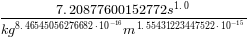

In [101]:
solar_mass = 2e30*sympy.physics.units.kg
light_speed = 3e8*sympy.physics.units.meter/sympy.physics.units.second
erg = sympy.physics.units.gram*(sympy.physics.units.cm/sympy.physics.units.second)**2
thomson_cross_section = 6.65e-25*sympy.physics.units.cm**2
proton_mass = 1.6e-27*sympy.physics.units.kg
temp = sympy.log(t_bo)-raw_closure
temp = temp.subs(psi,psi_relation.rhs)
temp = temp.subs(lmbda, lambda_relation.rhs)
temp = temp.subs(pomega, pomega_relation.rhs)
temp = temp.subs(sigma, sigma_relation.rhs)
temp = temp.subs(Tp_th, 50e3*sympy.physics.units.eV)
temp = temp.subs(T_ob, 50e3*sympy.physics.units.eV)
temp = temp.subs(Tp_0, 200e3*sympy.physics.units.eV)
temp = temp.subs(M, solar_mass)
temp = temp.subs(omega,3)
temp = temp.subs(mu,0.23)
temp = temp.subs(eta,4./3.)
temp = temp.subs(E_bo,1e46*erg)
temp = temp.subs(sigma_t, thomson_cross_section)
temp = temp.subs(c, light_speed)
temp = temp.subs(m, proton_mass)
sympy.exp(temp).n()

In [97]:
temp = sympy.log(t_bo)-raw_closure
temp = temp.diff(E_bo)*E_bo
temp = sympy.simplify(temp)
temp = temp.subs(psi,psi_relation.rhs)
temp = temp.subs(lmbda, lambda_relation.rhs)
temp = temp.subs(pomega, pomega_relation.rhs)
temp = temp.subs(sigma, sigma_relation.rhs)
temp = temp.subs(omega,3)
temp = temp.subs(eta,4./3.)
temp = temp.subs(mu,0.23)
temp

In [98]:
temp = sympy.log(t_bo)-raw_closure
temp = temp.diff(T_ob)*T_ob
temp = sympy.simplify(temp)
temp = temp.subs(psi,psi_relation.rhs)
temp = temp.subs(lmbda, lambda_relation.rhs)
temp = temp.subs(pomega, pomega_relation.rhs)
temp = temp.subs(sigma, sigma_relation.rhs)
temp = temp.subs(omega,3)
temp = temp.subs(eta,4./3.)
temp = temp.subs(mu,0.23)
temp

In [99]:
temp = sympy.log(t_bo)-raw_closure
temp = temp.diff(M)*M
temp = sympy.simplify(temp)
temp = temp.subs(psi,psi_relation.rhs)
temp = temp.subs(lmbda, lambda_relation.rhs)
temp = temp.subs(pomega, pomega_relation.rhs)
temp = temp.subs(sigma, sigma_relation.rhs)
temp = temp.subs(omega,3)
temp = temp.subs(eta,4./3.)
temp = temp.subs(mu,0.23)
temp